### The effect of the size of the training and test sets on model accuracy

#### Import modules and read data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
normal_data = pd.read_csv(os.getcwd() + '/Data/brain_tumour_normalized.csv')
normal_data.head()

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,Class
0,Image1,0.194705,0.212023,0.443074,0.274801,0.068211,0.010937,0.028236,0.475410,0.246092,0.603108,0.139694,0.981764,0.0,0
1,Image2,0.261489,0.276124,0.510114,0.674843,0.052278,0.007693,0.017951,0.797096,0.648383,0.773800,0.093527,0.997417,0.0,0
2,Image3,0.219003,0.392326,0.614200,0.001487,0.090618,0.016478,0.023280,0.012719,0.001173,0.230760,0.195261,0.972855,0.0,1
3,Image4,0.177300,0.329007,0.559750,0.001513,0.108202,0.021559,0.043805,0.012908,0.001192,0.196137,0.258588,0.941475,0.0,1
4,Image5,0.218223,0.249840,0.483677,0.370574,0.068403,0.011067,0.050836,0.564860,0.338854,0.560862,0.226679,0.960995,0.0,0


In [3]:
X, Y = normal_data[normal_data.columns[1 : 14]], normal_data[normal_data.columns[-1]]
X.shape, Y.shape

((3762, 13), (3762,))

#### Train/Test Split Size vs Accuracy

In [37]:
def sizeEffect(model, sizes, name, threshold = 0.45):
    acc_scores, recall_scores = [], []
    
    for size in sizes:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = size, random_state = 42)  # create splits
#         print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
        
        model.fit(X_train, Y_train)  # train model
        
        Y_pred = model.predict(X_test)  # get predictions
        
        # calc accuracy and sensitivity
        acc_scores.append(metrics.accuracy_score(Y_test, Y_pred))
        recall_scores.append(metrics.recall_score(Y_test, Y_pred))
        
#         acc = model.score(X_test, Y_test)
#         scores.append(acc)
#         print(acc)

#     print(scores)

    acc_scores, recall_scores = np.array(acc_scores), np.array(recall_scores)
    avg_acc, median_acc, avg_rec, median_rec = np.mean(acc_scores), np.median(acc_scores), np.mean(recall_scores), np.median(recall_scores)
    
    plt.plot(sizes, acc_scores, color = '#552583', marker = 'o', label = 'Accuracy')
    plt.plot(sizes, recall_scores, color = '#00788c', marker = 'o', label = 'Sensitivity')
#     bottom, top = plt.ylim()
#     plt.vlines(threshold, bottom, top, colors = '#000000')
    plt.axvline(threshold, color = '#000000', label = 'Threshold ({})'.format(threshold))
#     plt.plot(sizes, [avg] * len(sizes), color = '#ff8b00', label = 'Mean accuracy ' + str(round(avg, 4)))  #, alpha = 0.3)
#     plt.plot(sizes, [median] * len(sizes), color = '#1c39bb', label = 'Median accuracy ' + str(round(median, 4)))  #, alpha = 0.3)
    plt.xticks(np.round(sizes, 2), rotation = 45)
    plt.grid()
    plt.title('Train/Test Split Size vs Accuracy and Sensitivity:\n ' + name)
    plt.xlabel('Test Set Size (% of total data)')
    plt.ylabel('Accuracy, Sensitivity')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.getcwd() + '/Graphs/sizeEffect/' + name +'AccSens')
    plt.show()
    plt.close()
    
    print('Overall highest accuracy:', acc_scores.max() * 100)
    print('Corresponding sensitivity:', recall_scores[np.where(acc_scores == acc_scores.max())] * 100)
    print('Corresponding test size:', sizes[np.where(acc_scores == acc_scores.max())])  #[0])
    
    print('\nHighest accuracy where test size <', threshold, ':', acc_scores[sizes < threshold].max() * 100)
    print('Corresponding sensitivity:', recall_scores[np.where(acc_scores == acc_scores[sizes < threshold].max())] * 100)
    print('Corresponding test size:', sizes[np.where(acc_scores == acc_scores[sizes < threshold].max())])  #[0])
    
    print('\nMean accuray:', avg_acc * 100)
    print('Median accuracy:', median_acc * 100)
    
    print('-' * 10)
    
    print('Overall highest sensitivity:', recall_scores.max() * 100)
    print('Corresponding accuracy:', acc_scores[np.where(recall_scores == recall_scores.max())] * 100)
    print('Corresponding test size:', sizes[np.where(recall_scores == recall_scores.max())])  #[0])
    
    print('\nHighest sensitivity where test size <', threshold, ':', recall_scores[sizes < threshold].max() * 100)
    print('Corresponding accuracy:', recall_scores[np.where(recall_scores == recall_scores[sizes < threshold].max())] * 100)
    print('Corresponding test size:', sizes[np.where(recall_scores == recall_scores[sizes < threshold].max())])  #[0])
    
    print('\nMean sensitivity:', avg_rec * 100)
    print('Median sensitivity:', median_rec * 100)

Logistic Regression

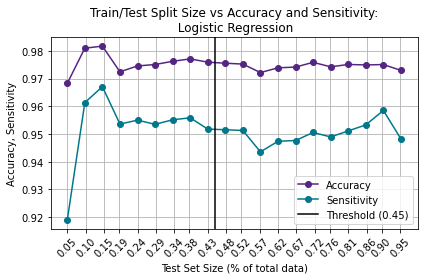

Overall highest accuracy: 98.16849816849816
Corresponding sensitivity: [96.70781893]
Corresponding test size: [0.145]

Highest accuracy where test size < 0.45 : 98.16849816849816
Corresponding sensitivity: [96.70781893]
Corresponding test size: [0.145]

Mean accuray: 97.50419936338334
Median accuracy: 97.50414607202087
----------
Overall highest sensitivity: 96.70781893004116
Corresponding accuracy: [98.16849817]
Corresponding test size: [0.145]

Highest sensitivity where test size < 0.45 : 96.70781893004116
Corresponding accuracy: [96.70781893]
Corresponding test size: [0.145]

Mean sensitivity: 95.12020272460819
Median sensitivity: 95.1651830945144


In [38]:
logisticRegr = LogisticRegression()  # create model

sizes = np.linspace(0.05, 1, num = 20, endpoint = False)  # test set sizes

sizeEffect(logisticRegr, sizes, 'Logistic Regression')

SVM - RBF Kernel

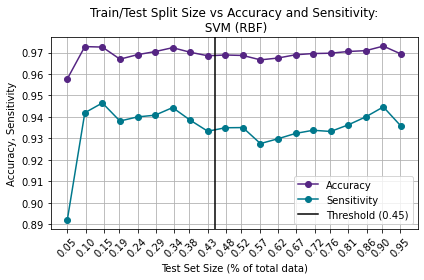

Overall highest accuracy: 97.29809104258443
Corresponding sensitivity: [94.46640316]
Corresponding test size: [0.905]

Highest accuracy where test size < 0.45 : 97.27520435967303
Corresponding sensitivity: [94.19354839]
Corresponding test size: [0.0975]

Mean accuray: 96.9166516240026
Median accuracy: 96.94123821694104
----------
Overall highest sensitivity: 94.65020576131687
Corresponding accuracy: [97.25274725]
Corresponding test size: [0.145]

Highest sensitivity where test size < 0.45 : 94.65020576131687
Corresponding accuracy: [94.65020576]
Corresponding test size: [0.145]

Mean sensitivity: 93.49410589612962
Median sensitivity: 93.60208867632448


In [39]:
svm_rbf = SVC(kernel = 'rbf', gamma = 'auto')  # create model

sizes = np.linspace(0.05, 1, num = 20, endpoint = False)  # test set sizes

sizeEffect(svm_rbf, sizes, 'SVM (RBF)')

SVM - Sigmoid Kernel

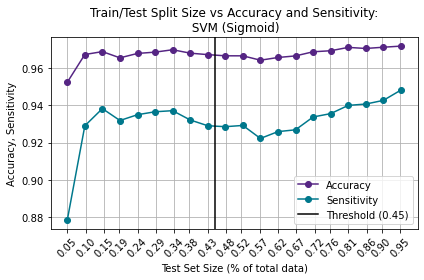

Overall highest accuracy: 97.18191964285714
Corresponding sensitivity: [94.82220836]
Corresponding test size: [0.9525]

Highest accuracy where test size < 0.45 : 96.98651863600317
Corresponding sensitivity: [93.71633752]
Corresponding test size: [0.335]

Mean accuray: 96.74110129586255
Median accuracy: 96.79590924237561
----------
Overall highest sensitivity: 94.82220835932627
Corresponding accuracy: [97.18191964]
Corresponding test size: [0.9525]

Highest sensitivity where test size < 0.45 : 93.82716049382715
Corresponding accuracy: [93.82716049]
Corresponding test size: [0.145]

Mean sensitivity: 93.10724648895284
Median sensitivity: 93.29785208669922


In [40]:
svm_sigmoid = SVC(kernel = 'sigmoid', gamma = 'auto')  # create model

sizes = np.linspace(0.05, 1, num = 20, endpoint = False)  # test set sizes

sizeEffect(svm_sigmoid, sizes, 'SVM (Sigmoid)')

SVM - Linear

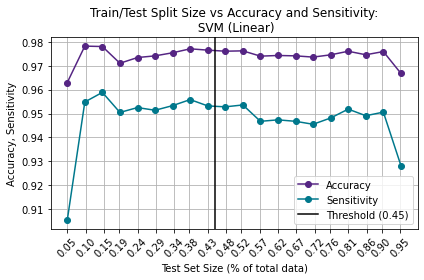

Overall highest accuracy: 97.82016348773843
Corresponding sensitivity: [95.48387097]
Corresponding test size: [0.0975]

Highest accuracy where test size < 0.45 : 97.82016348773843
Corresponding sensitivity: [95.48387097]
Corresponding test size: [0.0975]

Mean accuray: 97.41482213014929
Median accuracy: 97.4568559696108
----------
Overall highest sensitivity: 95.88477366255144
Corresponding accuracy: [97.8021978]
Corresponding test size: [0.145]

Highest sensitivity where test size < 0.45 : 95.88477366255144
Corresponding accuracy: [95.88477366]
Corresponding test size: [0.145]

Mean sensitivity: 94.78260019119024
Median sensitivity: 95.09835462818273


In [41]:
svm_linear = SVC(kernel = 'linear', gamma = 'auto')  # create model

sizes = np.linspace(0.05, 1, num = 20, endpoint = False)  # test set sizes

sizeEffect(svm_linear, sizes, 'SVM (Linear)')

Decision Tree

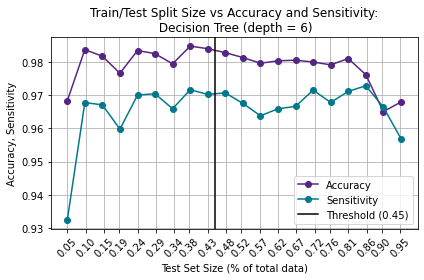

Overall highest accuracy: 98.47116052814454
Corresponding sensitivity: [97.16088328]
Corresponding test size: [0.3825]

Highest accuracy where test size < 0.45 : 98.47116052814454
Corresponding sensitivity: [97.16088328]
Corresponding test size: [0.3825]

Mean accuray: 97.88723723027213
Median accuracy: 98.03882640650212
----------
Overall highest sensitivity: 97.28033472803347
Corresponding accuracy: [97.61314321]
Corresponding test size: [0.8575]

Highest sensitivity where test size < 0.45 : 97.16088328075709
Corresponding accuracy: [97.16088328]
Corresponding test size: [0.3825]

Mean sensitivity: 96.58074296973149
Median sensitivity: 96.76296684379912


In [42]:
depth = 6
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = depth)  # create model based on Gini impurity

sizes = np.linspace(0.05, 1, num = 20, endpoint = False)  # test set sizes

sizeEffect(dTree, sizes, 'Decision Tree (depth = {})'.format(depth))

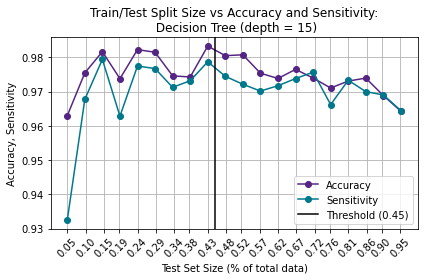

Overall highest accuracy: 98.33127317676144
Corresponding sensitivity: [97.87234043]
Corresponding test size: [0.43]

Highest accuracy where test size < 0.45 : 98.33127317676144
Corresponding sensitivity: [97.87234043]
Corresponding test size: [0.43]

Mean accuray: 97.51126584827506
Median accuracy: 97.44555073105111
----------
Overall highest sensitivity: 97.94238683127571
Corresponding accuracy: [98.16849817]
Corresponding test size: [0.145]

Highest sensitivity where test size < 0.45 : 97.94238683127571
Corresponding accuracy: [97.94238683]
Corresponding test size: [0.145]

Mean sensitivity: 97.00502683751814
Median sensitivity: 97.1946332704667


In [43]:
depth = 15
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = depth)  # create model based on Gini impurity

sizes = np.linspace(0.05, 1, num = 20, endpoint = False)  # test set sizes

sizeEffect(dTree, sizes, 'Decision Tree (depth = {})'.format(depth))

Naive Bayes

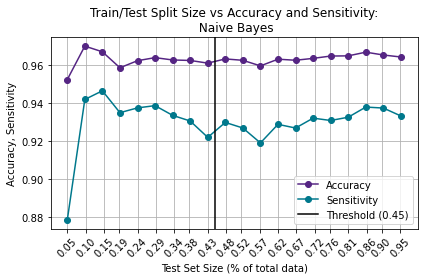

Overall highest accuracy: 97.00272479564033
Corresponding sensitivity: [94.19354839]
Corresponding test size: [0.0975]

Highest accuracy where test size < 0.45 : 97.00272479564033
Corresponding sensitivity: [94.19354839]
Corresponding test size: [0.0975]

Mean accuray: 96.30751415578116
Median accuracy: 96.32048556423874
----------
Overall highest sensitivity: 94.65020576131687
Corresponding accuracy: [96.7032967]
Corresponding test size: [0.145]

Highest sensitivity where test size < 0.45 : 94.65020576131687
Corresponding accuracy: [94.65020576]
Corresponding test size: [0.145]

Mean sensitivity: 92.99944415148448
Median sensitivity: 93.23482661202695


In [44]:
naiveBayes = GaussianNB()  # create model

sizes = np.linspace(0.05, 1, num = 20, endpoint = False)  # test set sizes

sizeEffect(naiveBayes, sizes, 'Naive Bayes')